In [37]:
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv('C:\Users\TOSHIBA-PC\Desktop\spmf (1)\Amazon_Unlocked_Mobile.csv')
data_df = data_df.dropna()
data_df = data_df[data_df['Rating'] != 0]
data_df = shuffle(data_df[:5000])
data_df = data_df.reset_index(drop=True)
data_df.head()


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,5.5 inch Factory unlocked world wide Note III ...,e passion,59.95,2,It was okay but the screen cracked after havin...,0.0
1,ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE...,Alcatel,292.98,5,Here’s why I went with the Acatel Idol 3 at 4....,77.0
2,"Alcatel One Touch Fierce 2, 4GB, 5"" Screen, Un...",Alcatel,118.99,3,it has become difficult to release me because ...,1.0
3,ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE...,Alcatel,129.00,5,"The best audio, the most vivid colors, fast en...",1.0
4,Apple iPhone 3GS 8GB Black Factory Unlocked / ...,Apple,33.00,5,My wife loves it. Works great. Thank you soon ...,0.0


In [3]:
all_reviews = data_df['Reviews']
all_sent_values = []
all_sentiments = []

from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)


C:\Python27\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
for i in range(0,5000):
    all_sent_values.append(sentiment_value(all_reviews[i]))


In [9]:
temp_data = data_df[0:20000]

Intervals
[ -1, -0.5) : 1, V.Negative
[-0.5, 0) : 2, Negative
[0] : 3, Neutral
(0, 0.5) : 4, Positive
[0.5, 1] : 5, V.Positive

In [11]:
SENTIMENT_VALUE = []
SENTIMENT = []
for i in range(0,5000):
    sent = all_sent_values[i]
    if (sent<=1 and sent>=0.5):
        SENTIMENT.append('V.Positive')
        SENTIMENT_VALUE.append(5)
    elif (sent<0.5 and sent>0):
        SENTIMENT.append('Positive')
        SENTIMENT_VALUE.append(4)
    elif (sent==0):
        SENTIMENT.append('Neutral')
        SENTIMENT_VALUE.append(3)
    elif (sent<0 and sent>=-0.5):
        SENTIMENT.append('Negative')
        SENTIMENT_VALUE.append(2)
    else:
        SENTIMENT.append('V.Negative')
        SENTIMENT_VALUE.append(1)

In [12]:
temp_data['SENTIMENT_VALUE'] = SENTIMENT_VALUE
temp_data['SENTIMENT'] = SENTIMENT

C:\Python27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
temp_data.head(5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,SENTIMENT_VALUE,SENTIMENT
0,5.5 inch Factory unlocked world wide Note III ...,e passion,59.95,2,It was okay but the screen cracked after havin...,0.0,4,Positive
1,ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE...,Alcatel,292.98,5,Here’s why I went with the Acatel Idol 3 at 4....,77.0,5,V.Positive
2,"Alcatel One Touch Fierce 2, 4GB, 5"" Screen, Un...",Alcatel,118.99,3,it has become difficult to release me because ...,1.0,1,V.Negative
3,ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE...,Alcatel,129.00,5,"The best audio, the most vivid colors, fast en...",1.0,5,V.Positive
4,Apple iPhone 3GS 8GB Black Factory Unlocked / ...,Apple,33.00,5,My wife loves it. Works great. Thank you soon ...,0.0,5,V.Positive


In [25]:
counter = 0
for i in range(0,5000):
    if (abs(temp_data['Rating'][i]-temp_data['SENTIMENT_VALUE'][i])>1):
        counter += 1


In [34]:
accuracy =  temp_data.shape[0] - counter
accuracy = float(accuracy) / float(temp_data.shape[0])
percent_accuracy = accuracy*100

In [35]:
percent_accuracy

76.25999999999999

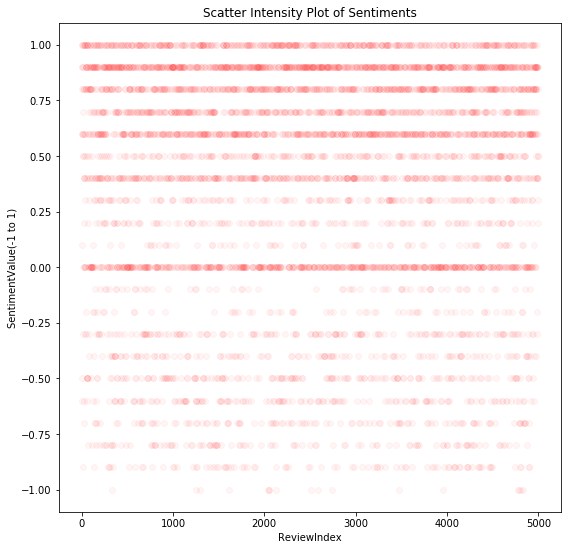

In [39]:
xaxis = []
for i in range(0,5000):
    xaxis.append(i)

ylabel_new_1 = all_sent_values[:5000]

xlabel = xaxis
plt.figure(figsize=(9,9))
plt.xlabel('ReviewIndex')
plt.ylabel('SentimentValue(-1 to 1)')
plt.plot(xlabel, ylabel_new_1, 'ro',  alpha=0.04)

plt.title('Scatter Intensity Plot of Sentiments')
plt.show()

Observation: Sentiment variation is concentrated towards positivity.